# Random forest

## Data from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = '/content/gdrive/MyDrive/Creditcard_data/creditcard.csv';

Mounted at /content/gdrive


## Credit card data

In [2]:
import pandas as pd

creditcard_df = pd.read_csv(PATH)
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
creditcard_df.shape

(284807, 31)

## Class-imbalance - fraud transactions

In [4]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Test Training Dataset

In [5]:
from sklearn.model_selection import train_test_split

X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 190820, test rows: 93987


## Random forest classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.9994999308414994

## Confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  125,    37],
       [   10, 93815]])

In [8]:
from sklearn.metrics import accuracy_score


tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.95%
sensitivity = 77.16%
specificity = 99.99%



# Define Functions for further research

In [10]:
from dataclasses import dataclass

@dataclass
class StatistictsData:
    name: str
    accuracy: float
    sensitivity: float
    specificity: float

def calculate_statistics(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) * 100
    sensitivity = tp / (tp + fn) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100

    return accuracy, sensitivity, specificity

In [11]:
def run_randomforest(X_train, X_test, y_train, **estimator_params):
    rf = RandomForestClassifier(random_state=0, **estimator_params)
    y_pred = rf.fit(X_train,y_train).fit(X_train, y_train).predict(X_test)
    return y_pred

In [12]:
def randomforest_evaluation(current_range, rf_statistics_list, **rf_params):
    y_pred = run_randomforest(X_train, X_test, y_train, **rf_params)
    stats = calculate_statistics(y_test, y_pred)
    rf_stats = StatistictsData(current_range, *stats)
    rf_statistics_list.append(rf_stats)

# Changing parameters of random forest

In [ ]:
statistics_max_depth = [] # 5 10 15 20 25 30
statistics_max_features = [] # 5 10 15 20 25 30
statistics_estimators_count = [] # 5 10 15 20 25 30

In [ ]:
common_range = range(5, 31, 5)

for size in common_range:
    # max depth
    randomforest_evaluation(size, statistics_max_depth, max_depth=size)
    # max features 
    randomforest_evaluation(size, statistics_max_features, max_features=size)
    # estimators count
    randomforest_evaluation(size, statistics_estimators_count, n_estimators=size)

In [ ]:
statistics_max_depth_rf = pd.DataFrame(statistics_max_depth)
statistics_max_depth_rf.rename(columns={'name':'max depth of random forest'}, inplace=True)
statistics_max_features_rf = pd.DataFrame(statistics_max_features)
statistics_max_features_rf.rename(columns={'name':'max features of random forest'}, inplace=True)
statistics_estimators_count_rf = pd.DataFrame(statistics_estimators_count)
statistics_estimators_count_rf.rename(columns={'name':'count of estimators'}, inplace=True)
grouped_stats_dfs = [statistics_max_depth_rf, statistics_max_features_rf, statistics_estimators_count_rf]

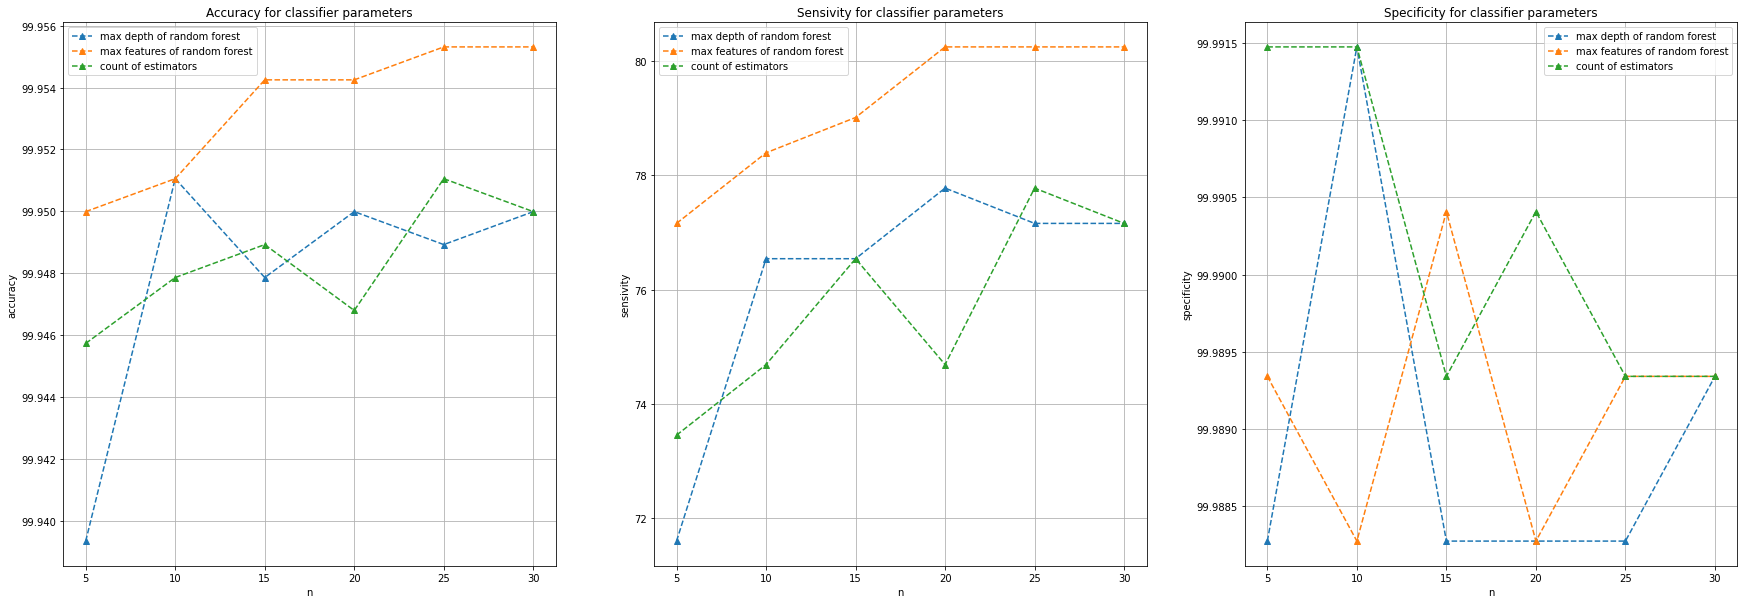

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_grouped_stats(ax, stats, stat_name):
    ax.plot(common_range, stats[0][stat_name], label="max depth of random forest", **plot_style)
    ax.plot(common_range, stats[1][stat_name], label="max features of random forest", **plot_style)
    ax.plot(common_range, stats[2][stat_name], label="count of estimators", **plot_style)
    ax.grid(b=True)
    ax.legend()

for i,stat_name in enumerate(["accuracy", "sensitivity", "specificity"]):
    plot_grouped_stats(axs[i], grouped_stats_dfs, stat_name)

axs[0].set(xlabel='n', ylabel='accuracy',
        title='Accuracy for classifier parameters')
axs[1].set(xlabel='n', ylabel='sensivity',
        title='Sensivity for classifier parameters')
axs[2].set(xlabel='n', ylabel='specificity',
        title='Specificity for classifier parameters')


loc = plticker.MultipleLocator(base=5.0)
for ax in axs:
    ax.xaxis.set_major_locator(loc)

plt.show()

## Conclusion
Accuracy and specificity are on level 99%. Sensitivity is the best for max depth about 20, max features above 20, and number of estimators about 25.

# Balancing the training dataset

## Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampled_dataset = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

X_train_under, y_train_under = sampled_dataset

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_under,y_train_under)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.979635481502761

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  145,    17],
       [ 1897, 91928]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 97.96%
sensitivity = 89.51%
specificity = 97.98%



## Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampled_dataset = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

X_train_over, y_train_over = sampled_dataset

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_over,y_train_over)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.999521210380159

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  127,    35],
       [   10, 93815]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.95%
sensitivity = 78.40%
specificity = 99.99%



## Smote

In [ ]:
from imblearn.over_sampling import  SMOTE

sampled_dataset = SMOTE(random_state=0).fit_resample(X_train, y_train)

X_train_smote, y_train_smote = sampled_dataset

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_smote,y_train_smote)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.9994999308414994

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  133,    29],
       [   18, 93807]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.95%
sensitivity = 82.10%
specificity = 99.98%



## Cluster Centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

sampled_dataset = ClusterCentroids(random_state=0).fit_resample(X_train, y_train)

X_train_cluster, y_train_cluster = sampled_dataset

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_cluster,y_train_cluster)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.06246608573526126

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  161,     1],
       [88115,  5710]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 6.25%
sensitivity = 99.38%
specificity = 6.09%



## SMOTETomek

In [ ]:
from imblearn.combine import  SMOTETomek

sampled_dataset = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

X_train_smote, y_train_smote = sampled_dataset

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_smote,y_train_smote)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.9995318501494888

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  134,    28],
       [   16, 93809]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.95%
sensitivity = 82.72%
specificity = 99.98%



## Conclusion

For Random Forest algorithm with Under Sampling for training dataset is the best to improve sensitivity and the model does not lose so much accuracy and specificity.


# Cost-Sensitive Learning

In [13]:
weights = range(1, 10)
weight_statisticts = [] 

for weight in weights:
    y_pred = run_randomforest(X_train, X_test, y_train, class_weight={0: 1, 1: weight} )
    stats = calculate_statistics(y_test,y_pred)
    data = StatistictsData(weight,*stats)
    weight_statisticts.append(data)

In [14]:
weight_statisticts_df = pd.DataFrame(weight_statisticts)
weight_statisticts_df.rename(columns={'name':'Weight of fraudation samples'}, inplace=True)

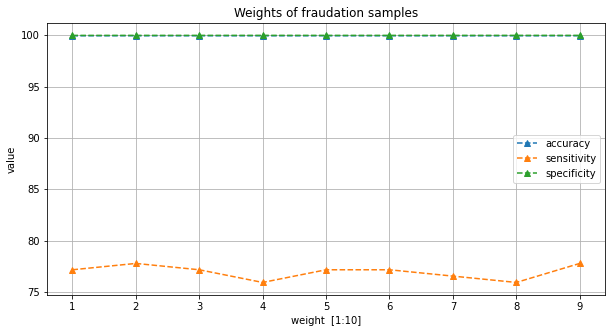

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(weights, weight_statisticts_df["accuracy"], label="accuracy", **plot_style)
ax.plot(weights, weight_statisticts_df["sensitivity"], label="sensitivity", **plot_style)
ax.plot(weights, weight_statisticts_df["specificity"], label="specificity", **plot_style)
ax.grid(b=True)
ax.legend()


ax.set(xlabel='weight  [1:10]', ylabel='value',
       title='Weights of fraudation samples')

plt.show()

## Conclusion

For Cost Sensitive Learning sensitivity is too small for further research.